In [1]:
#import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
#Load the data

df = pd.read_csv(r"C:\Users\Aishwarya\Desktop\Datasets\Wine.csv")
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
#Data description
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


<AxesSubplot:>

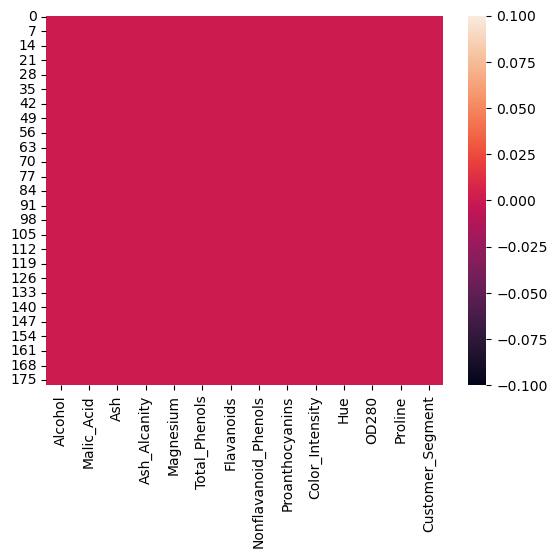

In [4]:
#Null values

sns.heatmap(df.isna())

In [5]:
#Define x and y

In [6]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [8]:
#Individual Models

lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.87      1.00      0.93        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36



C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
print(lg.score(xtrain,ytrain))
print(lg.score(xtest,ytest))

0.971830985915493
0.9444444444444444


In [10]:
#prediction function

In [11]:
def predict(model):
    model = model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    print(classification_report(ytest,ypred))
    print(model.score(xtrain,ytrain))
    print(model.score(xtest,ytest))

In [12]:
predict(LogisticRegression())

C:\Users\Aishwarya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.87      1.00      0.93        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36

0.971830985915493
0.9444444444444444


In [13]:
#Decision Tree, Random forest, KNN

In [14]:
import warnings

warnings.filterwarnings('ignore')

In [15]:
predict(KNeighborsClassifier())

              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.56      0.69      0.62        13
           3       0.29      0.22      0.25         9

    accuracy                           0.64        36
   macro avg       0.59      0.59      0.59        36
weighted avg       0.63      0.64      0.63        36

0.823943661971831
0.6388888888888888


In [16]:
predict(DecisionTreeClassifier())

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.80      0.92      0.86        13
           3       1.00      0.78      0.88         9

    accuracy                           0.89        36
   macro avg       0.91      0.88      0.89        36
weighted avg       0.90      0.89      0.89        36

1.0
0.8888888888888888


In [17]:
predict(BaggingClassifier(DecisionTreeClassifier()))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

1.0
0.9722222222222222


In [18]:
predict(BaggingClassifier(KNeighborsClassifier()))

              precision    recall  f1-score   support

           1       0.92      0.86      0.89        14
           2       0.69      0.69      0.69        13
           3       0.50      0.56      0.53         9

    accuracy                           0.72        36
   macro avg       0.71      0.70      0.70        36
weighted avg       0.73      0.72      0.73        36

0.852112676056338
0.7222222222222222


In [19]:
predict(RandomForestClassifier())

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

1.0
0.9722222222222222


# Boosting Classifier

In [20]:
predict(AdaBoostClassifier())

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.71      0.92      0.80        13
           3       1.00      0.56      0.71         9

    accuracy                           0.83        36
   macro avg       0.88      0.80      0.81        36
weighted avg       0.87      0.83      0.83        36

0.9225352112676056
0.8333333333333334


In [21]:
predict(GradientBoostingClassifier())

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.92      0.92      0.92        13
           3       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36

1.0
0.9444444444444444


In [22]:
#K-fold CV

In [23]:
kf = KFold(n_splits=10)

score = cross_val_score(GradientBoostingClassifier(),x,y, cv = kf)

In [24]:
score

array([0.94444444, 0.88888889, 0.94444444, 0.88888889, 0.83333333,
       1.        , 0.94444444, 0.83333333, 0.88235294, 1.        ])

In [25]:
score.mean()

0.9160130718954248

In [26]:
!pip install xgboost

In [27]:
from xgboost import XGBClassifier

In [28]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [29]:
le = LabelEncoder()

y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [30]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [31]:
predict(XGBClassifier())

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         9

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.98        36
weighted avg       0.97      0.97      0.97        36

1.0
0.9722222222222222


# Voting and Stacking Classifier

In [32]:
#Models list

In [33]:
models = []

models.append(('lr',LogisticRegression()))
models.append(('dt',DecisionTreeClassifier()))
models.append(('dt1',DecisionTreeClassifier(criterion='entropy')))
models.append(('knn', KNeighborsClassifier()))

In [34]:
models

[('lr', LogisticRegression()),
 ('dt', DecisionTreeClassifier()),
 ('dt1', DecisionTreeClassifier(criterion='entropy')),
 ('knn', KNeighborsClassifier())]

In [35]:
vt = VotingClassifier(estimators=models)

vt.fit(xtrain,ytrain)

ypred = vt.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.75      0.92      0.83        13
           2       1.00      0.67      0.80         9

    accuracy                           0.86        36
   macro avg       0.89      0.84      0.85        36
weighted avg       0.88      0.86      0.86        36



In [36]:
from sklearn.ensemble import StackingClassifier

In [39]:
predict(StackingClassifier(estimators=models, final_estimator = RandomForestClassifier(max_depth=3)))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.87      1.00      0.93        13
           2       1.00      0.89      0.94         9

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.94        36
weighted avg       0.95      0.94      0.95        36

0.9929577464788732
0.9444444444444444
